##Principal component analysis PCA

In [6]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Load the data

In [8]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/Iteration1_2488samples_ASE+SDA/atrium_SDA+ASE_v1_2488_samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
data.dropna(inplace=True)

### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [9]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   typicalGlazingRatio  2488 non-null   float64
 1   typicalWindowWidth   2488 non-null   int64  
 2   groundGlazingRatio   2488 non-null   float64
 3   groundWindowWidth    2488 non-null   int64  
 4   buildingDepth        2488 non-null   int64  
 5   balconyWidth         2488 non-null   int64  
 6   siteWidth            2488 non-null   int64  
 7   siteLength           2488 non-null   int64  
 8   floorDepth           2488 non-null   float64
 9   groundHeight         2488 non-null   int64  
 10  typicalHeight        2488 non-null   int64  
 11  levelNo              2488 non-null   int64  
 12  skylightArea         2488 non-null   float64
 13  netTotalArea         2488 non-null   int64  
 14  netGroundArea        2488 non-null   int64  
 15  buildingHeight       2488 non-null   i

In [10]:
# Print the first 5 rows
data.head()

,typicalGlazingRatio,typicalWindowWidth,groundGlazingRatio,groundWindowWidth,buildingDepth,balconyWidth,siteWidth,siteLength,floorDepth,groundHeight,typicalHeight,levelNo,skylightArea,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
0,0.700,2,0.800,4,16,1,51,60,0.800,3,3,6,532.000,32940,3060,21,11172,2528,51.900,46.400,9.100,1.200
1,0.700,3,0.800,2,15,6,66,70,1.000,5,3,5,1440.000,33720,4620,20,28800,3180,100.000,39.700,27.100,5.300
4,0.800,2,0.800,3,16,1,62,76,0.600,3,3,1,1320.000,7952,4712,6,7920,3392,71.000,81.200,19.000,16.500
6,0.900,3,0.800,2,15,4,63,70,1.000,4,3,5,1320.000,34260,4410,19,25080,3090,88.000,41.600,21.300,7.900
7,0.800,4,0.800,4,15,3,62,41,0.300,6,3,8,352.000,35504,2542,30,10560,2190,100.000,63.100,27.100,8.800


In [11]:
# Descriptive statistics
data.describe()

,typicalGlazingRatio,typicalWindowWidth,groundGlazingRatio,groundWindowWidth,buildingDepth,balconyWidth,siteWidth,siteLength,floorDepth,groundHeight,typicalHeight,levelNo,skylightArea,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
count,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000
mean,0.800,2.996,0.802,2.991,18.206,3.564,60.519,60.175,0.657,4.496,3.000,5.488,551.525,34517.066,3640.726,20.961,11545.540,3089.201,81.005,49.392,18.191,6.920
std,0.072,0.823,0.070,0.808,3.570,1.703,11.864,11.689,0.209,1.115,0.000,2.883,346.508,21136.491,1010.626,8.727,9259.506,854.592,21.759,13.573,8.872,2.679
min,0.700,2.000,0.700,2.000,15.000,1.000,40.000,40.000,0.300,3.000,3.000,1.000,100.000,3472.000,1600.000,6.000,720.000,1500.000,24.100,21.400,0.500,0.000
25%,0.700,2.000,0.800,2.000,15.000,2.000,50.000,50.000,0.500,4.000,3.000,3.000,308.000,17439.500,2891.000,13.000,5280.000,2464.000,62.000,39.600,11.500,5.200
50%,0.800,3.000,0.800,3.000,17.000,4.000,61.000,60.000,0.700,4.000,3.000,5.000,456.000,31459.500,3528.000,21.000,8921.000,2940.000,92.000,47.800,16.900,6.600
75%,0.900,4.000,0.900,4.000,20.000,5.000,71.000,70.000,0.800,6.000,3.000,8.000,702.000,47800.000,4334.000,29.000,14640.750,3610.000,100.000,56.600,23.800,8.400
max,0.900,4.000,0.900,4.000,33.000,6.000,80.000,80.000,1.000,6.000,3.000,10.000,2352.000,115100.000,6400.000,36.000,78336.000,5952.000,100.000,99.400,54.600,20.800


In [12]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='levelNo')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pal = sns.color_palette("mako", as_cmap=True)
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='atriumVolume', palette='PuRd', kind="hist")

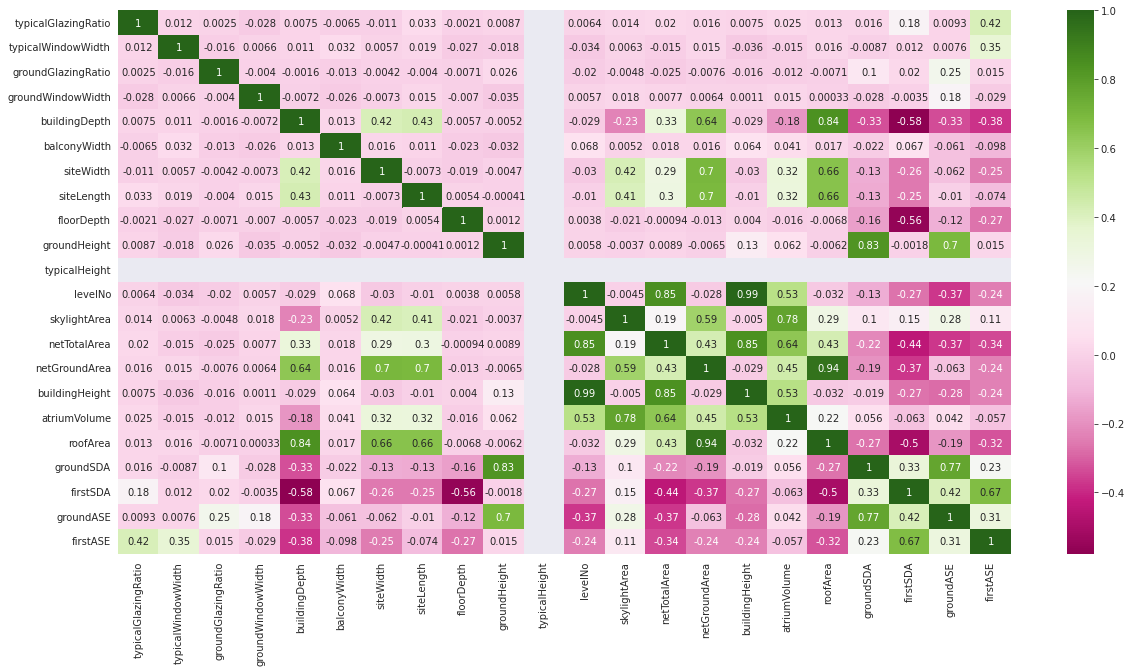

In [13]:
# And lastly, a correlation plot
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG", ax=ax)

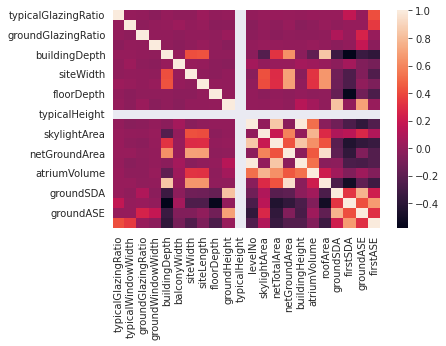

In [14]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [15]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [18]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

,typicalGlazingRatio,typicalWindowWidth,groundGlazingRatio,groundWindowWidth,buildingDepth,balconyWidth,siteWidth,siteLength,floorDepth,groundHeight,typicalHeight,levelNo,skylightArea,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
count,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000
mean,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.380,-1.211,-1.447,-1.228,-0.898,-1.506,-1.730,-1.726,-1.709,-1.342,0.000,-1.557,-1.303,-1.469,-2.020,-1.715,-1.169,-1.860,-2.616,-2.063,-1.995,-2.584
25%,-1.380,-1.211,-0.025,-1.228,-0.898,-0.919,-0.887,-0.871,-0.751,-0.445,0.000,-0.863,-0.703,-0.808,-0.742,-0.912,-0.677,-0.732,-0.874,-0.722,-0.754,-0.642
50%,0.005,0.005,-0.025,0.011,-0.338,0.256,0.041,-0.015,0.206,-0.445,0.000,-0.169,-0.276,-0.145,-0.112,0.004,-0.283,-0.175,0.505,-0.117,-0.146,-0.119
75%,1.390,1.221,1.396,1.250,0.503,0.844,0.884,0.841,0.685,1.349,0.000,0.871,0.434,0.629,0.686,0.921,0.334,0.610,0.873,0.531,0.632,0.553
max,1.390,1.221,1.396,1.250,4.145,1.431,1.642,1.696,1.643,1.349,0.000,1.565,5.197,3.813,2.731,1.724,7.215,3.351,0.873,3.685,4.105,5.183


### Executing PCA

In [19]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [20]:
# Fit the model
model.fit(data_scaled)

PCA()

In [34]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)
#data_num_reduced_df["species"] = data["species"]
data_num_reduced_df= data_num_reduced_df.round(decimals=1)
print(data_num_reduced_df)

         0      1      2      3      4      5      6      7      8      9   \
0     0.400 -2.200 -1.000 -0.200 -2.600 -0.000 -1.700 -0.800 -0.800 -0.400   
1     1.300  1.900  1.700 -0.500 -2.800 -0.700  1.800  1.100  1.400 -0.700   
2    -1.600  3.300 -0.900  3.600 -0.800 -0.600 -0.600 -1.700 -0.700 -0.600   
3     0.900  1.400  1.100  1.100 -1.400 -2.100  1.700 -0.600  0.800 -0.400   
4    -2.200 -0.500  2.300 -0.400  1.300  1.000 -1.000  1.100 -1.000  1.400   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2483 -1.800  2.100 -1.500 -2.100  0.400 -0.300 -0.500  0.800  0.400  1.600   
2484 -0.600  1.300 -0.700 -0.300  0.700 -0.500  1.800  0.100  1.500  2.200   
2485  3.800 -0.400  1.500 -1.100  0.700  2.300 -0.500  0.200  0.500 -1.400   
2486  0.200  2.400  0.200 -0.700 -1.000  1.800  1.600 -0.400 -2.000 -0.000   
2487  1.700 -1.500  1.200  0.500 -0.900 -0.100  0.300  1.600  0.200 -1.800   

         10     11     12     13     14     15     16     17   

### Inspecting Results

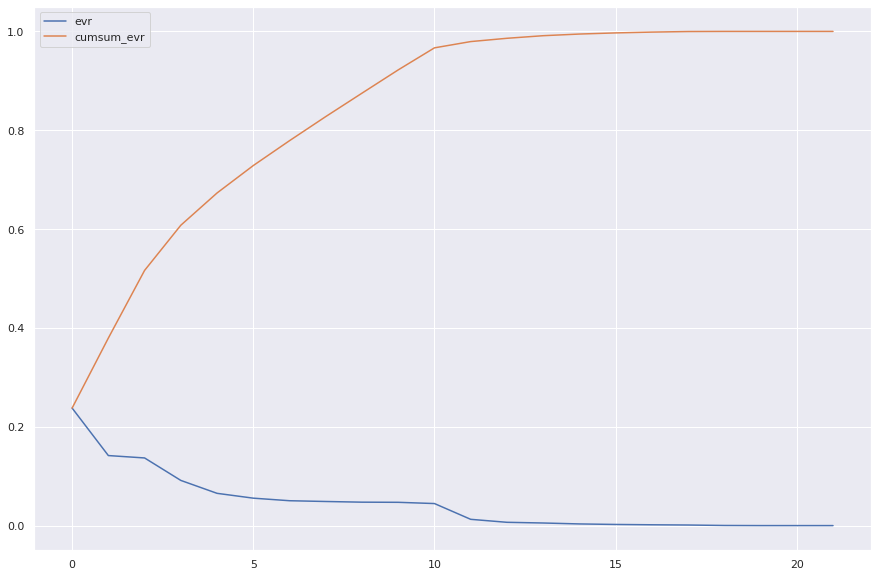

In [22]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [35]:
print(model.explained_variance_ratio_)

[2.37783611e-01 1.41707847e-01 1.36877618e-01 9.14132293e-02
 6.52837077e-02 5.55016186e-02 5.03184869e-02 4.87680508e-02
 4.73867202e-02 4.71033677e-02 4.45925305e-02 1.26790799e-02
 6.65581075e-03 5.24405050e-03 3.35020005e-03 2.30097049e-03
 1.63785226e-03 1.15712869e-03 2.38120312e-04 2.75080932e-33
 2.38046095e-33 8.96013629e-35]


PLOTTING ALL THE PCS

In [46]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'black', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

No handles with labels found to put in legend.


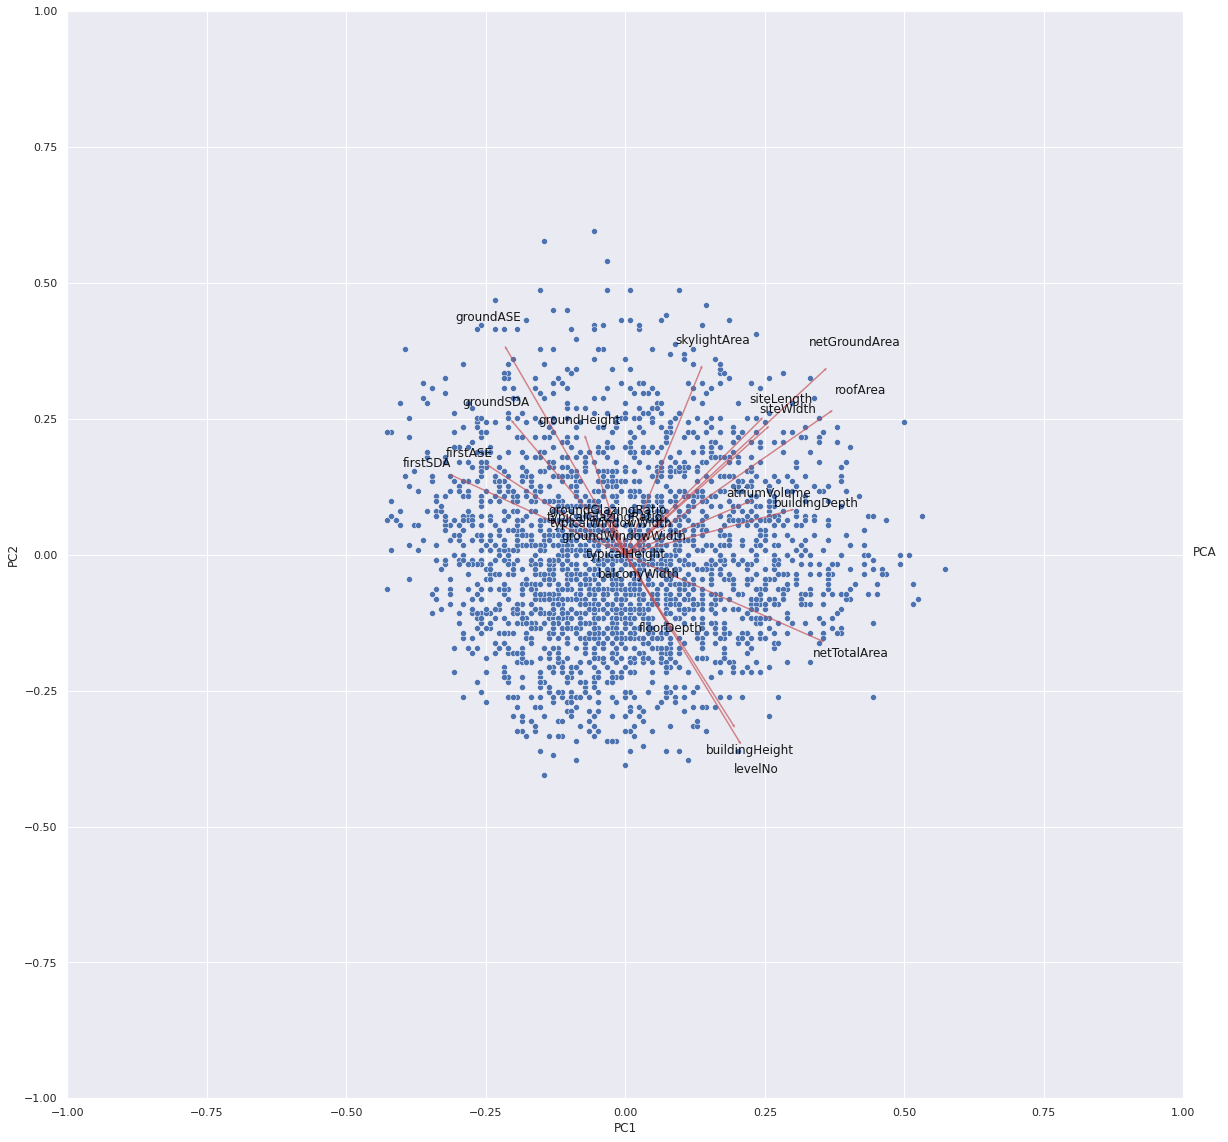

In [47]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()

fig.set_size_inches(20, 20)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [26]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

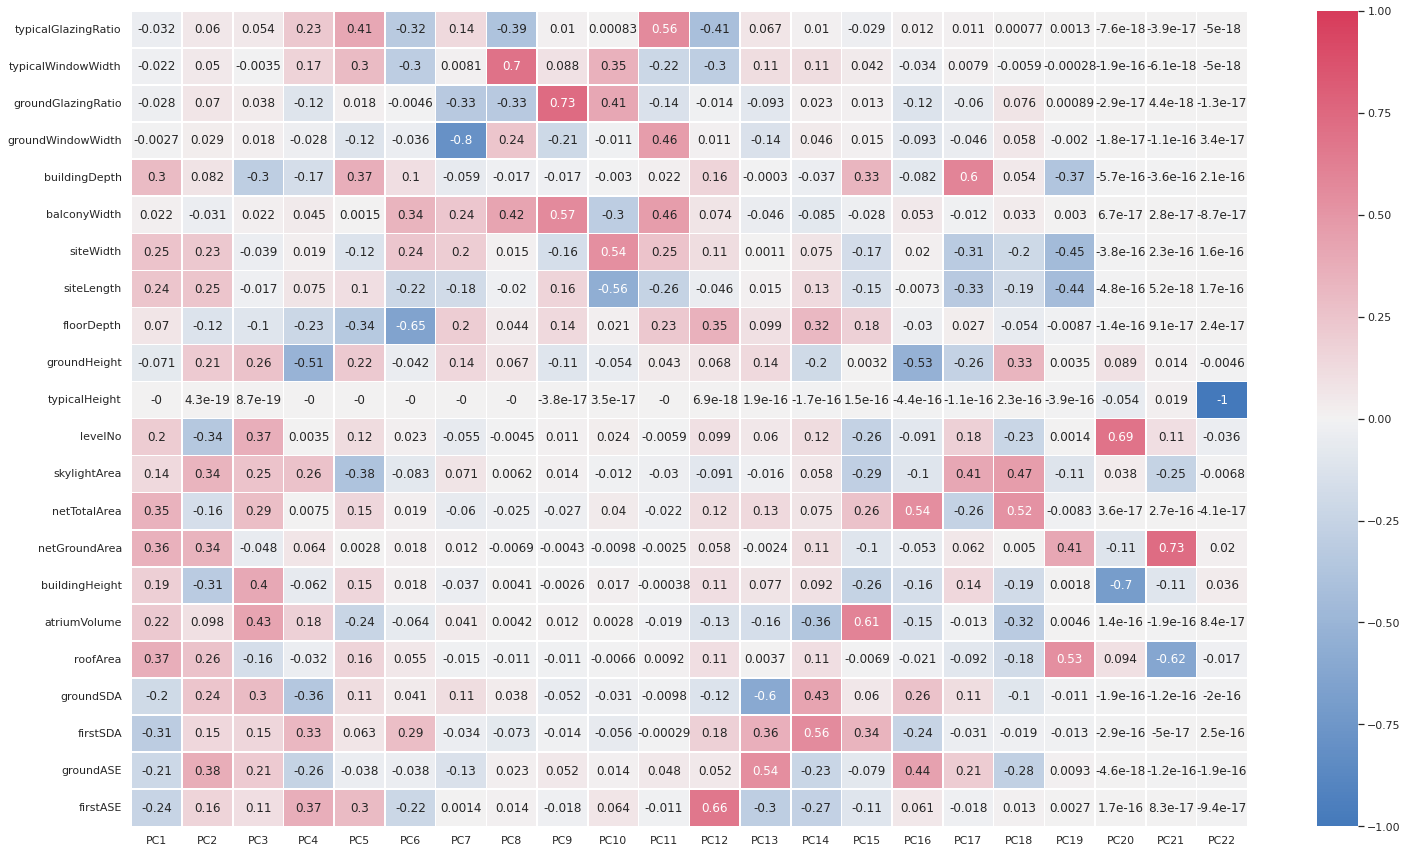

In [37]:
#cmap="viridis"
#cmap="crest"
#cmap="mako"
#cmap=pal
pal = sns.diverging_palette(250, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap=pal, vmin=-1, vmax=1, annot=True)

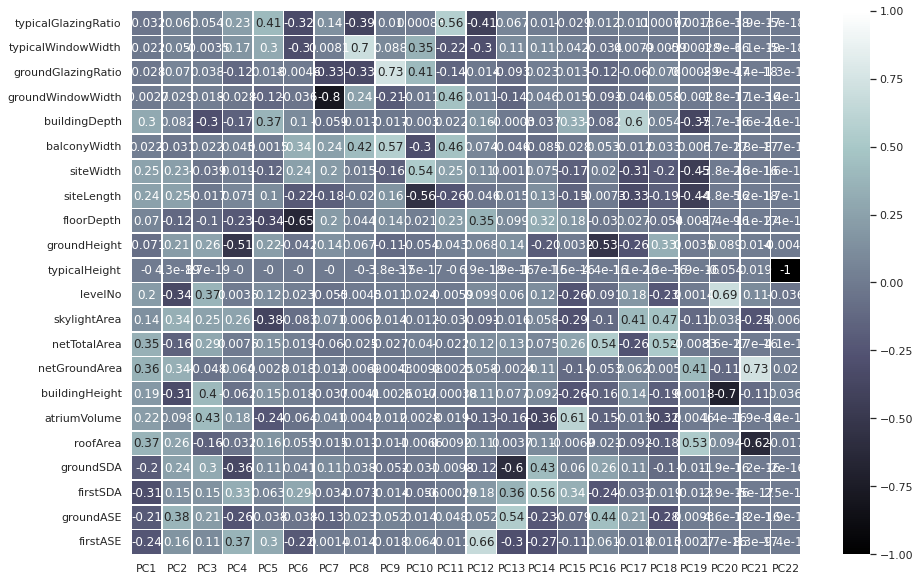

In [28]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [29]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                    1
0    PC0             roofArea
1    PC1            groundASE
2    PC2         atriumVolume
3    PC3         groundHeight
4    PC4  typicalGlazingRatio
5    PC5           floorDepth
6    PC6    groundWindowWidth
7    PC7   typicalWindowWidth
8    PC8   groundGlazingRatio
9    PC9           siteLength
10  PC10  typicalGlazingRatio
11  PC11             firstASE
12  PC12            groundSDA
13  PC13             firstSDA
14  PC14         atriumVolume
15  PC15         netTotalArea
16  PC16        buildingDepth
17  PC17         netTotalArea
18  PC18             roofArea
19  PC19       buildingHeight
20  PC20        netGroundArea
21  PC21        typicalHeight
